In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Discovering
## 1/ Import data

In [2]:
walmart_df = pd.read_csv('Walmart_sales.csv')
walmart_df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## 2/ Data structure

In [3]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


6435 entries, 7 columns

# Cleaning
## 1/ Null

In [4]:
print("Before:", walmart_df.shape)
walmart_df = walmart_df.dropna(ignore_index=True)
print("After:", walmart_df.shape)

Before: (6435, 8)
After: (6435, 8)


## 2/ Duplicates

In [5]:
print("Before:", walmart_df.shape)
walmart_df = walmart_df.drop_duplicates(ignore_index=True)
print("After:", walmart_df.shape)

Before: (6435, 8)
After: (6435, 8)


## 3/ Convert dtype
`Date` is converted into datetime

In [6]:
walmart_df['Date'] = pd.to_datetime(walmart_df['Date'], format='%d-%m-%Y')

In [7]:
walmart_df['Store'] = walmart_df['Store'].astype(str)

## 4/ Outliers

In [8]:
walmart_df.describe()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


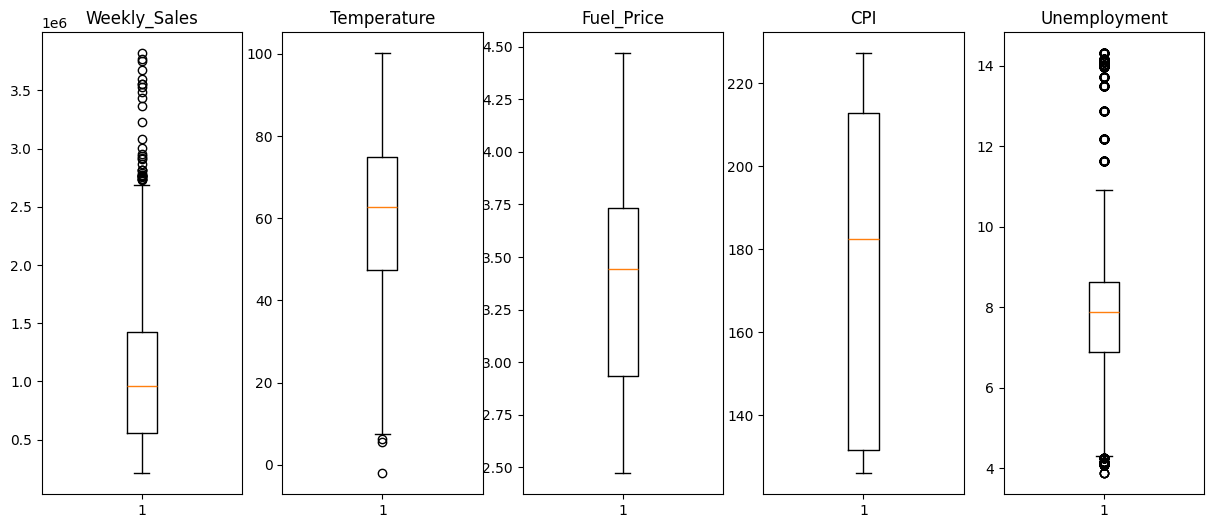

In [9]:
fig, axes = plt.subplots(1,5, sharex=False, sharey=False)
fig.set_size_inches(15,6)

axes[0].boxplot(walmart_df['Weekly_Sales'])
axes[0].set_title('Weekly_Sales')

axes[1].boxplot(walmart_df['Temperature'])
axes[1].set_title('Temperature')

axes[2].boxplot(walmart_df['Fuel_Price'])
axes[2].set_title('Fuel_Price')

axes[3].boxplot(walmart_df['CPI'])
axes[3].set_title('CPI')

axes[4].boxplot(walmart_df['Unemployment'])
axes[4].set_title('Unemployment')

plt.show()

In [10]:
# OUTLIER REMOVAL 

print('Before:', len(walmart_df))

for column in ['Weekly_Sales', 'Temperature', 'CPI', 'Fuel_Price', 'Unemployment']:
    notnull_series = walmart_df[walmart_df[column].isna()==False][column]
    q1 = np.quantile(notnull_series, 0.25)
    q3 = np.quantile(notnull_series, 0.75)
    iqr = q3-q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    outlier = walmart_df[(walmart_df[column]>upper_bound) | (walmart_df[column]<lower_bound)][column]
    walmart_df = walmart_df.drop(outlier.index)
    print('Entries after remove',column, len(walmart_df))
    


Before: 6435
Entries after remove Weekly_Sales 6401
Entries after remove Temperature 6398
Entries after remove CPI 6398
Entries after remove Fuel_Price 6398
Entries after remove Unemployment 5917


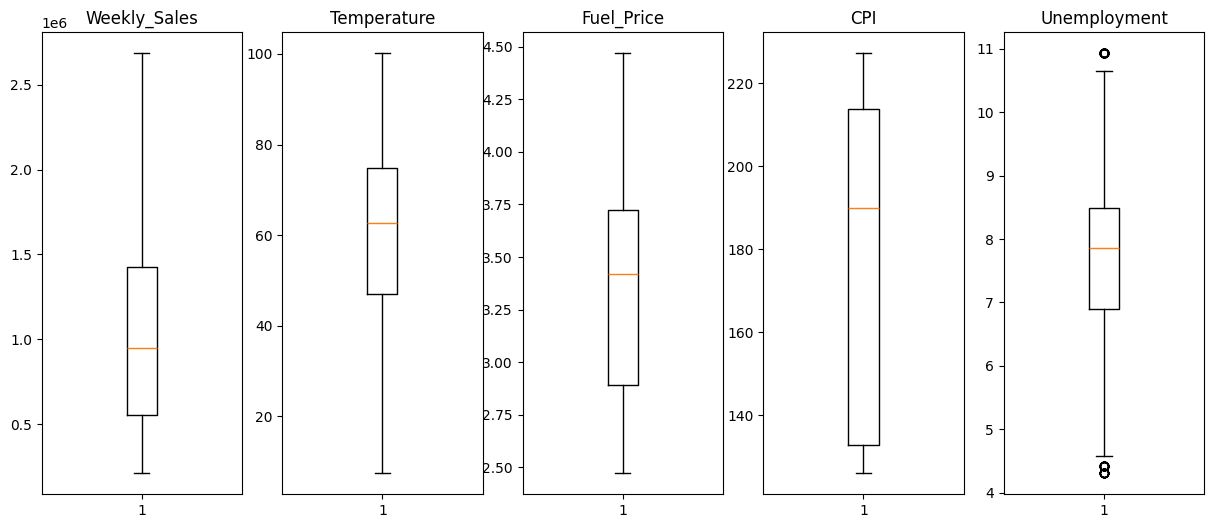

In [11]:
fig, axes = plt.subplots(1,5, sharex=False, sharey=False)
fig.set_size_inches(15,6)

axes[0].boxplot(walmart_df['Weekly_Sales'])
axes[0].set_title('Weekly_Sales')

axes[1].boxplot(walmart_df['Temperature'])
axes[1].set_title('Temperature')

axes[2].boxplot(walmart_df['Fuel_Price'])
axes[2].set_title('Fuel_Price')

axes[3].boxplot(walmart_df['CPI'])
axes[3].set_title('CPI')

axes[4].boxplot(walmart_df['Unemployment'])
axes[4].set_title('Unemployment')

plt.show()

## 5/ Descriptive statistics

In [22]:
walmart_df.describe()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,5917,5.917000e+03,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000
mean,2011-06-14 17:15:31.485550080,1.039313e+06,0.069123,60.433407,3.340543,175.023148,7.722305
min,2010-02-05 00:00:00,2.099862e+05,0.000000,7.460000,2.472000,126.064000,4.308000
25%,2010-10-08 00:00:00,5.525292e+05,0.000000,46.980000,2.891000,132.767067,6.891000
50%,2011-06-10 00:00:00,9.472292e+05,0.000000,62.620000,3.420000,190.006988,7.852000
75%,2012-02-17 00:00:00,1.427624e+06,0.000000,74.730000,3.721000,213.799099,8.494000
max,2012-10-26 00:00:00,2.685352e+06,1.000000,100.140000,4.468000,227.232807,10.926000
std,NaN,5.519450e+05,0.253684,18.386455,0.458200,39.023139,1.243337


# Analyzing
**List of questions**
* `Store`
    * How many stores were investigated?
    * Which stores had the best sales (in total)
* `Date`
    * Plot the total sales per day over the time. What was the trend? Which day sold most (least)?
    * Best store of the week (top sales per week)
*  `Holiday_Flag`
    * How many holiday in total?
    * Among holiday weeks, which were the weeks with greatest sales?
    * *(hypo)* Sales of holiday weeks were more than that of normal weeks
* `Temperature` (same for `Fuel_price`, `CPI`, `Unemployment`)
    * What were the hotest (coldest) weeks each year?
    * How about the sales of those weeks compared to the rest of each year?
    * *(hypo)* Sales and temp are correlated


## Q1
**How many stores were investigated? Which stores had the best sales (in total)**

In [13]:
sale_by_store = walmart_df.groupby('Store').agg(
                    total_sales = pd.NamedAgg(column='Weekly_Sales', aggfunc=sum)
                    , average_Temperature = pd.NamedAgg(column='Temperature', aggfunc=np.mean)
                    , average_Fuel_Price = pd.NamedAgg(column='Fuel_Price', aggfunc=np.mean)
                    , average_CPI = pd.NamedAgg(column='CPI', aggfunc=np.mean)
                    , average_Unemployment = pd.NamedAgg(column='Fuel_Price', aggfunc=np.mean)

)
sale_by_store = sale_by_store.reset_index().sort_values('total_sales')
sale_by_store.head(3)

C:\Users\ASUS FLIP 14\AppData\Local\Temp\ipykernel_8368\2833969787.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sale_by_store = walmart_df.groupby('Store').agg(
C:\Users\ASUS FLIP 14\AppData\Local\Temp\ipykernel_8368\2833969787.py:1: FutureWarning: The provided callable <function mean at 0x0000016C58E128E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sale_by_store = walmart_df.groupby('Store').agg(


,Store,total_sales,average_Temperature,average_Fuel_Price,average_CPI,average_Unemployment
31,38,7347378.89,84.828824,4.013882,130.901331,4.013882
3,12,16386710.79,84.828824,4.013882,130.901331,4.013882
20,28,21106767.80,84.828824,4.013882,130.901331,4.013882


In [14]:
print(f"""Lowest total sales: {sale_by_store.iloc[0,0]},{sale_by_store.iloc[1,0]},{sale_by_store.iloc[2,0]}
Highest total sales: {sale_by_store.iloc[-1,0]},{sale_by_store.iloc[-2,0]},{sale_by_store.iloc[-3,0]}
      """)

Lowest total sales: 38,12,28
Highest total sales: 20,14,2
      


**What are the characteristics of high sales and low sales stores?**

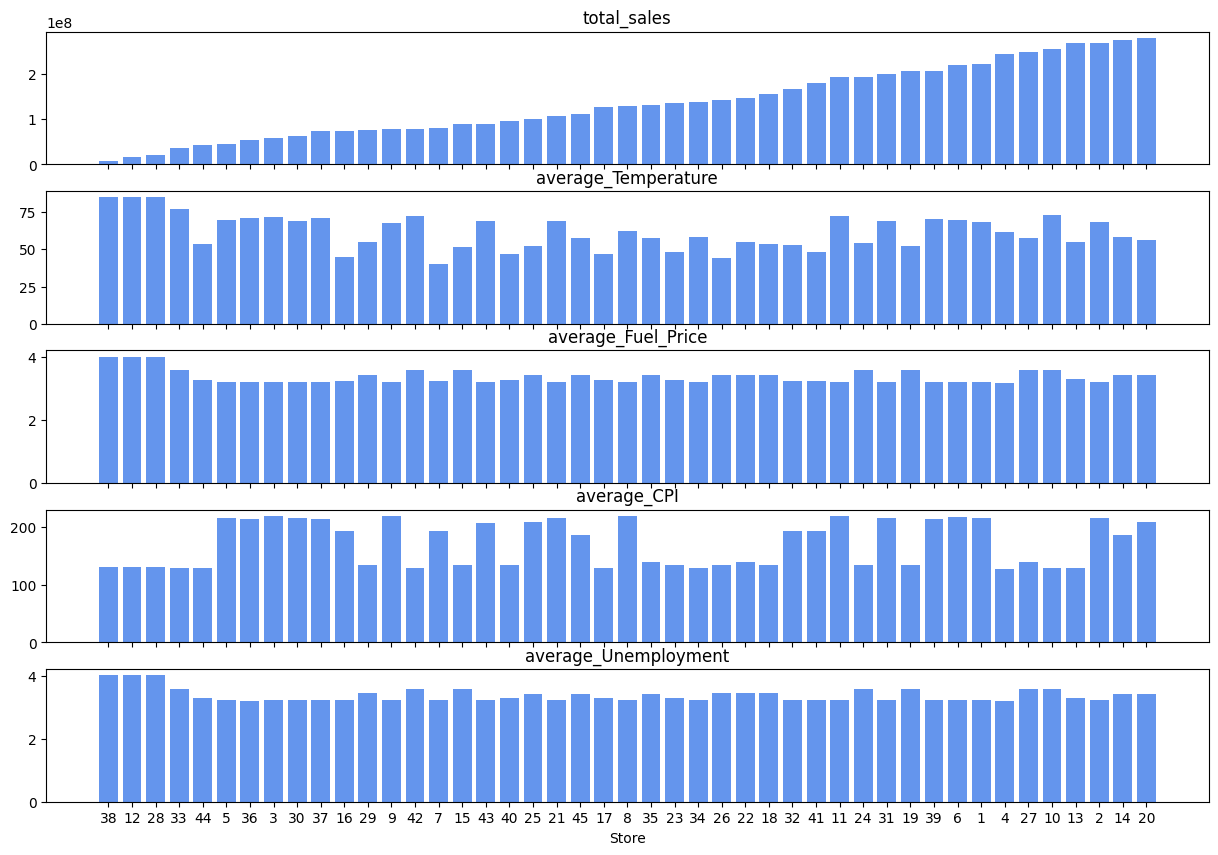

In [15]:
fig, axes = plt.subplots(5,1, sharex=True)
fig.set_size_inches(15,10)

ax_num = 0
for y in sale_by_store.columns[1:]:
    axes[ax_num].bar(height=sale_by_store[y], x=sale_by_store['Store'], color='cornflowerblue')
    axes[ax_num].set_title(y)
    ax_num+=1

plt.xlabel('Store')

plt.show()

In [16]:
sale_by_store.head()

,Store,total_sales,average_Temperature,average_Fuel_Price,average_CPI,average_Unemployment
31,38,7347378.89,84.828824,4.013882,130.901331,4.013882
3,12,16386710.79,84.828824,4.013882,130.901331,4.013882
20,28,21106767.80,84.828824,4.013882,130.901331,4.013882
26,33,37160221.96,76.728182,3.575923,128.679669,3.575923
38,44,43293087.84,53.697133,3.286147,128.679669,3.286147


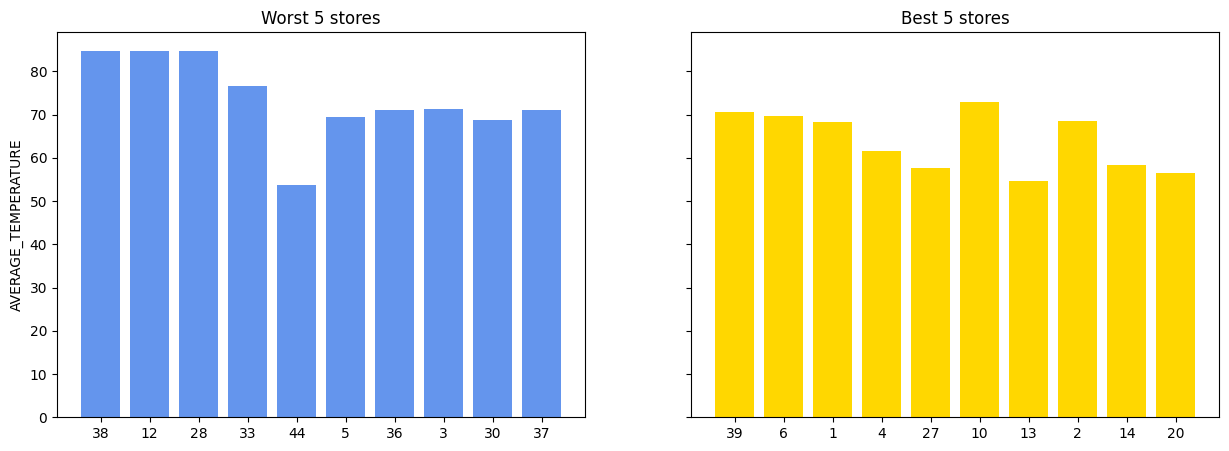

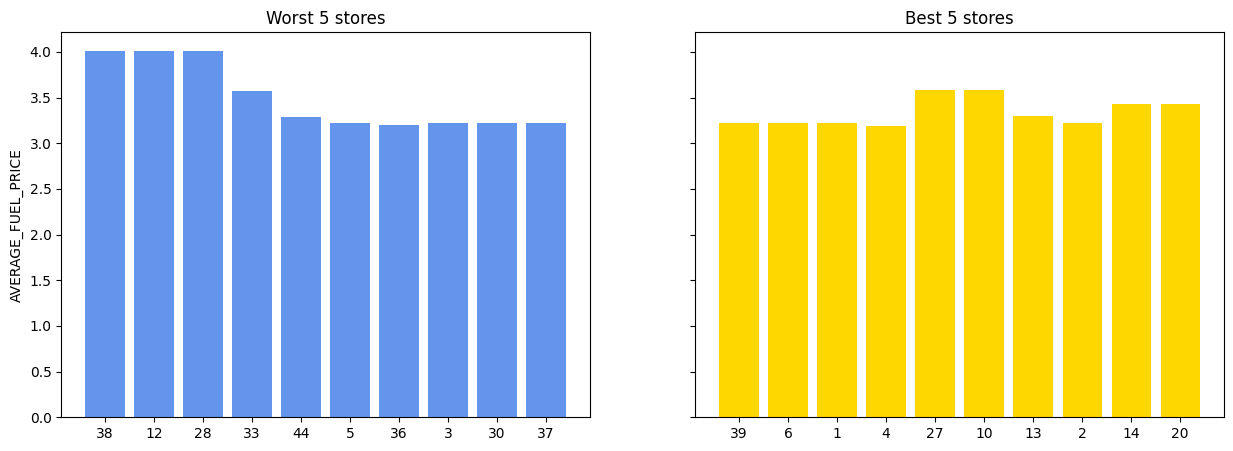

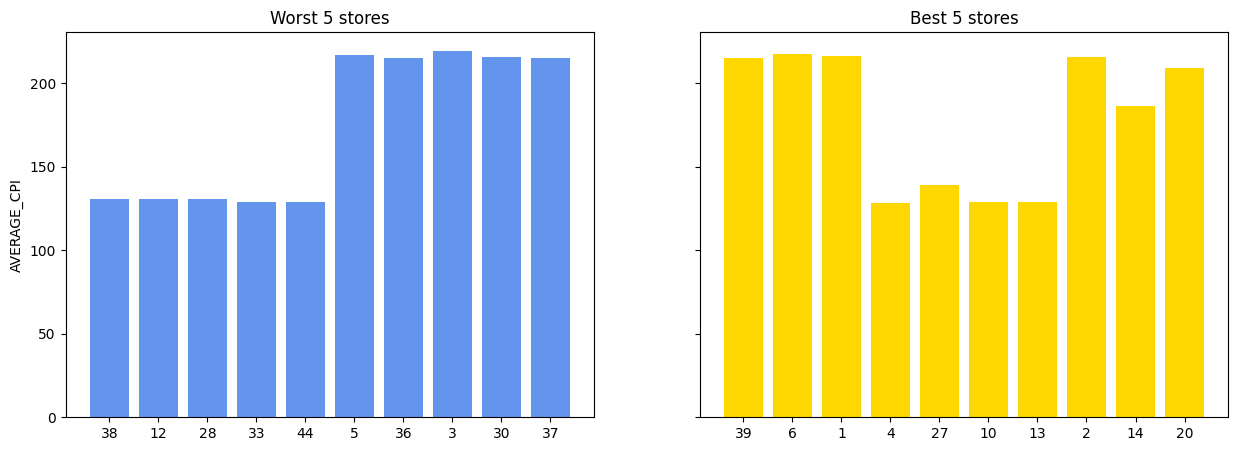

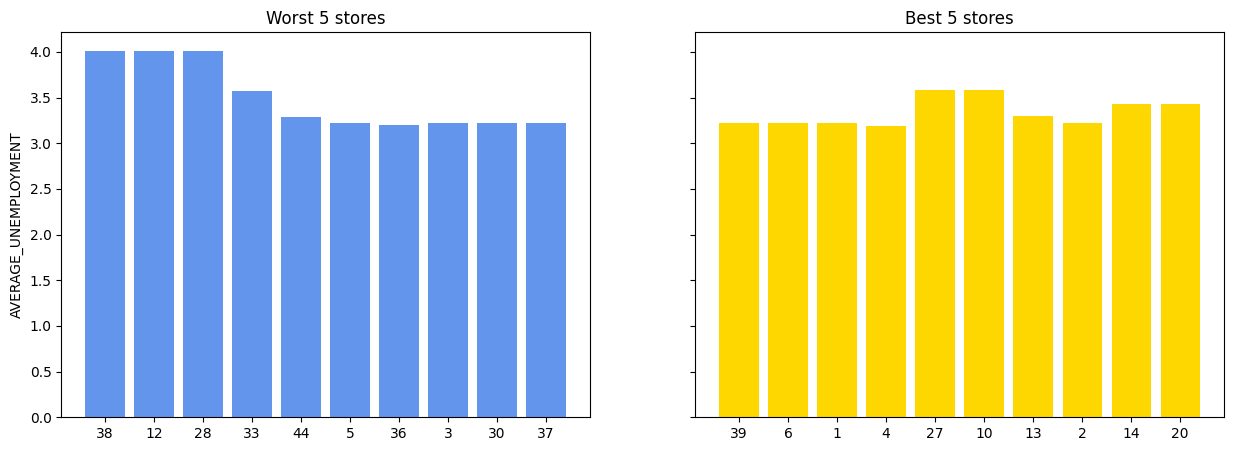

In [17]:
for col in sale_by_store.columns[2:]:
    fig, axes = plt.subplots(1,2, sharey=True)
    fig.set_size_inches(15,5)

    axes[0].bar(height=sale_by_store[col].head(10)
                , x=sale_by_store['Store'].head(10)
                , color='cornflowerblue')
    axes[0].set_title('Worst 5 stores')

    axes[1].bar(height=sale_by_store[col].tail(10)
                , x=sale_by_store['Store'].tail(10)
                , color='gold')
    axes[1].set_title('Best 5 stores')

    axes[0].set_ylabel(col.upper())

    plt.show()

### **Finding 1**

Stores with good sales are 
* in cooler regions, 
* lower fuel_price, 
* higher CPI, 
* and lower unemployment rate

## Q2
* Plot the total sales per day over the time. What was the trend? Which day sold most (least)?
* Best store of the week (top sales per week)

In [18]:
sale_by_week = walmart_df.groupby('Date').agg(
                    total_sales = pd.NamedAgg(column='Weekly_Sales', aggfunc=sum)
                    , average_Temperature = pd.NamedAgg(column='Temperature', aggfunc=np.mean)
                    , average_Fuel_Price = pd.NamedAgg(column='Fuel_Price', aggfunc=np.mean)
                    , average_CPI = pd.NamedAgg(column='CPI', aggfunc=np.mean)
                    , average_Unemployment = pd.NamedAgg(column='Fuel_Price', aggfunc=np.mean)
)

sale_by_week = sale_by_week.reset_index().sort_values('Date')

sale_by_week.head(3)

C:\Users\ASUS FLIP 14\AppData\Local\Temp\ipykernel_8368\1829468547.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sale_by_week = walmart_df.groupby('Date').agg(
C:\Users\ASUS FLIP 14\AppData\Local\Temp\ipykernel_8368\1829468547.py:1: FutureWarning: The provided callable <function mean at 0x0000016C58E128E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sale_by_week = walmart_df.groupby('Date').agg(


,Date,total_sales,average_Temperature,average_Fuel_Price,average_CPI,average_Unemployment
0,2010-02-05,46619845.70,32.935000,2.700405,170.680086,2.700405
1,2010-02-12,45317630.91,33.171429,2.676024,170.777704,2.676024
2,2010-02-19,45363033.79,36.497619,2.654714,170.824929,2.654714


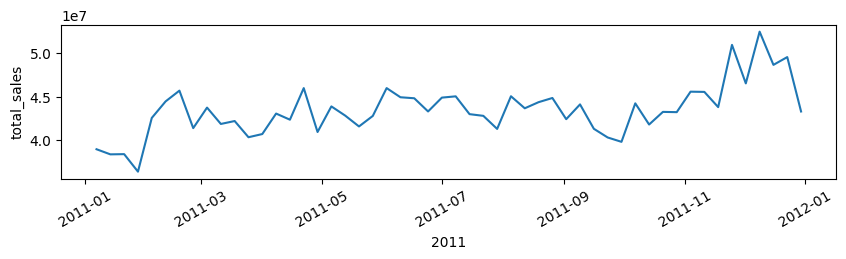

In [19]:
fig=plt.gcf()
fig.set_size_inches(10,2)

sns.lineplot(sale_by_week[sale_by_week['Date'].dt.year == 2011], x='Date', y='total_sales')

plt.xlabel('2011')
plt.xticks(rotation=30)
plt.show()

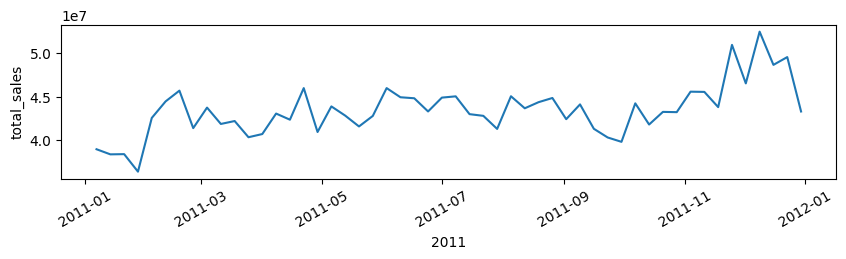

In [20]:
fig=plt.gcf()
fig.set_size_inches(10,2)

sns.lineplot(sale_by_week[sale_by_week['Date'].dt.year == 2011], x='Date', y='total_sales')

plt.xlabel('2011')
plt.xticks(rotation=30)
plt.show()

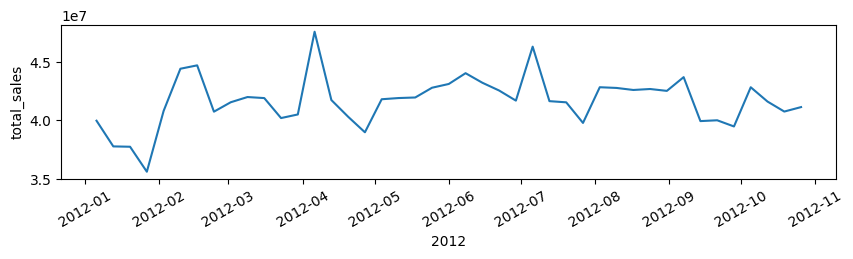

In [21]:
fig=plt.gcf()
fig.set_size_inches(10,2)

sns.lineplot(sale_by_week[sale_by_week['Date'].dt.year == 2012], x='Date', y='total_sales')

plt.xlabel('2012')
plt.xticks(rotation=30)
plt.show()

# Hypothesis testing

In [23]:
from scipy.stats.stats import pearsonr

C:\Users\ASUS FLIP 14\AppData\Local\Temp\ipykernel_8368\4005289447.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [25]:
x=walmart_df['CPI']
y=walmart_df['Weekly_Sales']

pearsonr(x,y)

PearsonRResult(statistic=-0.08297669066596997, pvalue=1.6328797298067533e-10)

In [26]:
x=walmart_df['Unemployment']
y=walmart_df['Weekly_Sales']

pearsonr(x,y)

PearsonRResult(statistic=-0.07309164834106414, pvalue=1.815726263263237e-08)

In [27]:
x=walmart_df['Fuel_Price']
y=walmart_df['Weekly_Sales']

pearsonr(x,y)

PearsonRResult(statistic=0.01966403065796355, pvalue=0.13042604112895184)

In [28]:
x=walmart_df['Temperature']
y=walmart_df['Weekly_Sales']

pearsonr(x,y)

PearsonRResult(statistic=-0.04168603954464425, pvalue=0.0013399103795964382)